 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Hand-written-digit-recognizer-using-MNIST-dataset" data-toc-modified-id="Hand-written-digit-recognizer-using-MNIST-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hand written digit recognizer using MNIST dataset</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Loading-training-data" data-toc-modified-id="Loading-training-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading training data</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Data-Dimensions" data-toc-modified-id="Data-Dimensions-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data Dimensions</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Helper-Function-for-plotting-images" data-toc-modified-id="Helper-Function-for-plotting-images-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Helper-Function for plotting images</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Plot-a-few-images-to-see-if-data-is-correct" data-toc-modified-id="Plot-a-few-images-to-see-if-data-is-correct-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Plot a few images to see if data is correct</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Multi-Layer-Perceptron" data-toc-modified-id="Multi-Layer-Perceptron-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multi-Layer Perceptron</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Flatten-the-images-to-a-vector-and-Normalize-the-images" data-toc-modified-id="Flatten-the-images-to-a-vector-and-Normalize-the-images-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Flatten the images to a vector and Normalize the images</a></span></li><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#One-hot-encoding" data-toc-modified-id="One-hot-encoding-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>One hot encoding</a></span></li><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Build-the-model" data-toc-modified-id="Build-the-model-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Build the model</a></span></li><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Run-the-model" data-toc-modified-id="Run-the-model-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Run the model</a></span></li><li><span><a href="http://localhost:8888/notebooks/projects/OCR/mnist-keras.ipynb#Helper-functions-to-show-performance" data-toc-modified-id="Helper-functions-to-show-performance-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Helper functions to show performance</a></span></li></ul></li></ul></li></ul></div>

# Hand written digit recognizer using MNIST dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
#matplotlib.rcParams['figure.figsize'] = (12, 15)
import numpy as np
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
# Random seed for reproducibility
seed = 13
np.random.seed(seed)

## Loading training data

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(54000, 28, 28)
(54000,)
(6000, 28, 28)
(6000,)
(10000, 28, 28)
(10000,)


### Data Dimensions

In [8]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

## Helper-Function for plotting images

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
            
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
            
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

### Plot a few images to see if data is correct


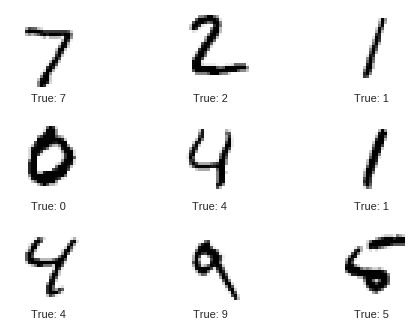

In [10]:
# Get the first images from the test-set.
images = X_test[0:9]

# Get the true classes for those images.
cls_true = y_test[0:9]

# Plot the images and labels using the helper-function above.
plot_images(images=images, cls_true=cls_true)

## Multi-Layer Perceptron

### Flatten the images to a vector and Normalize the images
It is always a good idea to perform some scaling of input values when using neural network models.

In [11]:
def flatten_and_normalize_images():
    num_pixels_ = X_train.shape[1] * X_train.shape[2]
    X_train_ = X_train.reshape(X_train.shape[0], num_pixels_) / 255
    X_val_ = X_val.reshape(X_val.shape[0], num_pixels_) / 255
    X_test_ = X_test.reshape(X_test.shape[0], num_pixels_) / 255
    return X_train_, X_val_, X_test_
    

In [12]:
X_train_, X_val_, X_test_ = flatten_and_normalize_images()

### One hot encoding

The class-labels are One-Hot encoded, which means that each label is a vector with 10 elements, all of which are zero except for one element. The index of this one element is the class-number, that is, the digit shown in the associated image. We also need the class-numbers as integers for the test-set.

In [13]:
y_train[0]

7

In [14]:
# one hot encode outputs
y_train_ = keras.utils.np_utils.to_categorical(y_train)
y_val_ = keras.utils.np_utils.to_categorical(y_val)
y_test_ = keras.utils.np_utils.to_categorical(y_test)
num_classes  = y_test_.shape[1]

In [15]:
y_train[0]

7

### Build the model

- This is a simple neural network with two hidden layers with the same number of neurons as there are inputs. A rectifier activation function is used for the neurons in the hidden layer.

- A softmax activation is used on the output layer to turn the outputs into probability-like values.

- Logarithmic loss is used as the loss function (called ```categorical_crossentropy``` in keras) and the efficient **ADAM** gradient descent algorithm is used to learn the weights.


In [16]:
# Define baseline model
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(img_size_flat, input_dim=img_size_flat, \
                    kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, input_dim=img_size_flat, \
                    kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Run the model

- Fit over 10 epochs with updates every 256 images.

In [17]:
# Build the model
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________


In [18]:
plot_model(model, to_file='model.png') 

In [19]:
# Fit the model
history = model.fit(X_train_, y_train_, 
          validation_data=(X_val_, y_val_), epochs=10, batch_size=256)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s - loss: 0.3943 - acc: 0.8892 - val_loss: 0.1617 - val_acc: 0.9540
Epoch 2/10
54000/54000 [==============================] - 9s - loss: 0.1403 - acc: 0.9589 - val_loss: 0.1207 - val_acc: 0.9635
Epoch 3/10
54000/54000 [==============================] - 10s - loss: 0.0896 - acc: 0.9734 - val_loss: 0.0856 - val_acc: 0.9732
Epoch 4/10
54000/54000 [==============================] - 10s - loss: 0.0627 - acc: 0.9818 - val_loss: 0.0707 - val_acc: 0.9787
Epoch 5/10
54000/54000 [==============================] - 9s - loss: 0.0456 - acc: 0.9868 - val_loss: 0.0707 - val_acc: 0.9795
Epoch 6/10
54000/54000 [==============================] - 9s - loss: 0.0337 - acc: 0.9898 - val_loss: 0.0595 - val_acc: 0.9812
Epoch 7/10
54000/54000 [==============================] - 10s - loss: 0.0251 - acc: 0.9930 - val_loss: 0.0603 - val_acc: 0.9818
Epoch 8/10
54000/54000 [==============================] - 1

In [20]:
# Final evaluation of the model
test_loss, test_acc = model.evaluate(X_test_, y_test_, verbose=0)
print("Baseline Error: {}".format(100-test_acc*100))
print("Test Accuracy: {}".format(test_acc))

Baseline Error: 2.1099999999999994
Test Accuracy: 0.9789


### Helper functions to show performance

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [22]:
def plot_history(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

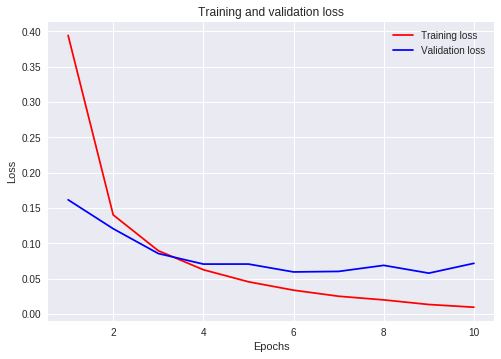

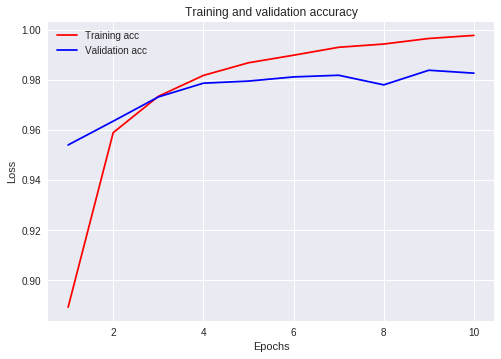

In [23]:
plot_history(history)

In [24]:
def print_confusion_matrix():
    
    # Get the predicted classifications for the test-set
    cls_pred = model.predict_classes(X_test_)
    
    # Get the confusion matrix using sklearn
    cm = confusion_matrix(y_true=y_test,
                          y_pred=cls_pred)
    
    # Print the confusion matrix as text
    print("\n\n")
    print(cm)
    
    # Plot the confusion matrix.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

 9600/10000 [===========================>..] - ETA: 0s


[[ 968    0    3    0    1    0    4    1    3    0]
 [   0 1121    4    0    0    0    2    1    7    0]
 [   0    0 1019    0    1    0    3    3    6    0]
 [   1    0    8  982    0    3    0    6    6    4]
 [   1    0    4    0  962    0    5    2    2    6]
 [   1    0    0   15    1  855    4    1   12    3]
 [   2    3    2    1    2    4  941    0    3    0]
 [   1    2   10    1    0    0    1 1004    3    6]
 [   1    0    3    2    0    1    1    4  961    1]
 [   2    2    0    4    7    3    2    3   10  976]]


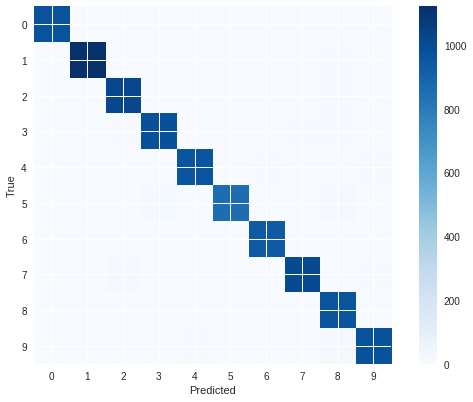

In [25]:
print_confusion_matrix()

In [26]:
%load_ext version_information
%version_information keras, numpy, matplotlib

Software versions
Python 3.6.2 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.1.0
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
keras 2.0.6
numpy 1.12.1
matplotlib 2.0.2
Fri Sep 15 16:53:06 2017 CDT